* Code this problem up by dividing your jet into slices (making sure you use even bins in logarithmic space!).
* Loop through the slices and calculate the Spectum from each slice!
* Then add to a Total Spectrum for the Entire Jet (or technically both jets). 
* Ideally you will plot Each Component as well as the Total to check that your $\nu_{SSA}$ is doing what you expect.
* To test your code, use an accretion power appropriate for Sgr A*, $r_{0} = 10 r_{g}$ and $\nu = 0.3c$. (but at this point don’t Lorentz transform anything, it’s not relativistic enough to be a huge effect). 
* Normalise your initial $L_{j}$ such that either $F_{\nu}$ in Janskys ($10^{−23} erg/cm^{−2}/sec/Hz$) or Total Power per Frequency bin ($erg/s/Hz$) matches the values for Sgr A* at $10^{12} Hz$.


In [1]:
#Importing the libraries we need.
import numpy as np
import matplotlib.pyplot as plt
import math

#We first define all the Constant values we have in cgs units!

q = 5e-10 #Electron Charge
mass_e = 1e-27 #Mass of electron
c = 3e10 #Speed of Light
velocity = 0.3 * c #Velocity of the Jet Plasma
p = 2
frequency_SSA = 1e12 #Frequency of SSA in terms of Hz
radius_initial = 1e13 #The Initial Radius of the Black Hole/Jet
efficiency_factor = 0.1

mass_acc = 1e16 #Mass Accretion Rate for Sgr A*
mass_sgrA = 4e6 #The mass of the Sgr A in terms of Solar Mass
edd_lum = 1.25e38 * mass_sgrA #Eddington Luminosity

In [16]:
#Assume that we are starting from D = 0 to D = 2.55e22 cm (The distance of
#Sgr A* to Earth)
#From this, we can define our "Even Bin Slices"
#For this we use logspace so that it goes from 10^0 to 10^22!
distance = np.logspace(0, 22, 100)

#We also define a frequency interval.
frequency = np.logspace(0, 20, 100)

In [17]:
#Now we define the change in Radius in time.
#From geometry we can do the following:
    #Since opening angle is 10 degrees and the half of it is 5 degrees,
    #taking the tangent of that angle will be equal to R(t)/D(t) so the
    #Radius divided by distance at the given time.
    #From here we can find R(t) = tan(5 deg) * D(t)
    
def Radius(distance):
    """Takes the distance and returns the Radius of the slice of the jet at that
    distance."""
    
    #Defining radius using R(t) = tan(5 deg) * D(t)
    radius_time = radius_initial + (distance * np.tan(np.deg2rad(5)))
    
    return radius_time

In [18]:
#Now we need to define the Source Function to find the Specific Intensity per
#slice.
#First, we need to define the Total Power of the jet.
#Since the Total Power of the Jet has two terms that depends on Radius,
#we define them first.

#First parameter that depends on Radius is the Magnetic Field.
def Magnetic_Field(distance):
    """Takes the distance and calculates the Magnetic Field Strength 
    at that distance."""
    
    #Numerator of Magnetic Field Strength
    magnetic_field_1 = (efficiency_factor)*mass_acc*(c**2)
    
    #Denominator of Magnetic Field Strength
    magnetic_field_2 = velocity * (Radius(distance) ** 2)
    
    #The Magnetic Field Strength
    magnetic_field = np.sqrt(magnetic_field_1 / magnetic_field_2)

    return magnetic_field

In [19]:
#Next, we define the Normalization Constant for the Power.
def Norm_Constant_Power(distance):
    """Takes the distance and calculates the Normalization Constant for Power
    so "C" at that time."""
    
    #Numerator of Normalization Constant
    normalization_constant_1 = (efficiency_factor)*mass_acc*(c**2)
    
    #Denominator of Normalization Constant
    normalization_constant_2 = 8 * np.pi * velocity * (Radius(distance) ** 2)
    
    #The Normalization Constant
    normalization_constant = normalization_constant_1 / normalization_constant_2
    
    return normalization_constant

In [20]:
#Now we can also define the Normalization Constant for Absorption Coefficient.
def Norm_Constant_Abs_Coeff(distance):
    """Takes the distance and calculates the Normalization Constant for 
    Absorption Coefficient so "C hat" at that time."""
    
    #Numerator of Normalization Constant
    normalization_constant_1 = (efficiency_factor)*mass_acc*(c**2)
    
    #Denominator of Normalization Constant
    normalization_constant_2 = 8 * np.pi * velocity * (Radius(distance) ** 2)
    
    #The Normalization Constant
    normalization_constant = (normalization_constant_1 / normalization_constant_2)
    
    #So far we got the C.
    #Since C hat is equal to C times the mass of electron and speed of light 
    #squared we can write the following.
    normalization_constant = normalization_constant * mass_e * (c**2)
    
    return normalization_constant

In [21]:
#Now we define the Absorption Coefficient. (Using the formula from the question)
def Absorption_Coefficient(distance, frequency):
    """Takes the distance and the frequency, then calculates the Absorption 
    Coefficient at that distance and frequency."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    abs_coeff_1 = (np.sqrt(3)*pow(q,3))/(8*np.pi*mass_e)
    abs_coeff_2 = ((3*q)/(2*math.pi*pow(mass_e,3)*pow(c,5))) ** p/2
    abs_coeff_3 = Norm_Constant_Abs_Coeff(distance)
    abs_coeff_4 = Magnetic_Field(distance) ** ((p+2)/2)
    abs_coeff_5 = math.gamma(((3*p)+2)/12) * math.gamma(((3*p)+22)/12)
    abs_coeff_6 = frequency ** (-(p+4)/2)

    #Absorption Coefficient
    abs_coeff = abs_coeff_1 * abs_coeff_2 * abs_coeff_3 * abs_coeff_4 * abs_coeff_5 * abs_coeff_6

    
    return abs_coeff

In [31]:
#Now we define the Total Power.
def Total_Power(distance, frequency):
    """Takes the distance and the frequency, then calculates the Total Power 
    at that distance and frequency."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    total_power_1 = (np.sqrt(3)*pow(q,3))/(2*np.pi*mass_e*pow(c,2)*(p+1))
    total_power_2 = Norm_Constant_Power(distance)
    total_power_3 = Magnetic_Field(distance)
    total_power_4 = math.gamma((p/4)+(19/12)) * math.gamma((p/4)-(1/12))
    total_power_5 = ((mass_e * c * ((q * Magnetic_Field(distance)) / (mass_e * c))) / (3 * q * Magnetic_Field(distance))) ** -((p-1)/2)
    
    #Total Power
    total_power = total_power_1 * total_power_2 * total_power_3 * total_power_4 * total_power_5 * 2 * math.pi

    return total_power

In [32]:
#Now we can get the Source Function.
def Source_Function(distance, frequency):
    """Takes the distance and the frequency, then calculates the Source Function
    at that distance and frequency."""
    
    source_function = Total_Power(distance, frequency) / (4 * np.pi * Absorption_Coefficient(distance, frequency))
    
    return source_function

In [33]:
#Now we also can get the Optical Depth.
def Optical_Depth(distance, frequency):
    """Takes the distance and frequency, then calculates the Optical Depth at 
    that distance and frequency."""
    
    optical_depth = Absorption_Coefficient(distance, frequency) * Radius(distance)
    
    return optical_depth

In [34]:
#We can now define the Intensity at given distance!
def Specific_Intensity(distance, frequency):
    """Takes the distance and frequency, then calculates the Specific Intensity 
    at that distance and frequency."""

    specific_intensity = Source_Function(distance, frequency) * (1 - np.exp(-Optical_Depth(distance, frequency)))

    return specific_intensity

In [39]:
#From here, we finally define our Flux which depends on Intensity, Area of
#the emitting surface and our distance to the slice.

def Flux(distance):
    """Takes the distance then calculates the Flux at that frequency."""
    
    #We define an array for flux and frequency values for the distance we are in.
    flux_distance = np.array([])
    
    #We bring our frequency interval in.
    frequency = np.logspace(0, 20, 100)
    
    #Now we find the flux for each frequency in order to create an array of our
    #frequency and flux values, which will give us the spectrum for that distance.
    for i in range(len(frequency)):
        flux_1 = Specific_Intensity(distance, frequency) * (np.pi * (Radius(distance)**2))
        flux_2 = 4 * np.pi * (distance**2)
        flux = flux_1 * flux_2
    
    flux_distance = np.append(flux_distance, flux)
    
    return flux_distance

In [40]:
#Now for every distance we have, we will calculate a spectrum.
#Every distance means a slice, we will add them up in order to get our
#complete spectrum of the jet.

#We define a new array for our total flux for all slices.
total_flux = np.zeros(len(distance))

#Now we get the total flux for each distance we have.
for i in range(len(distance)):
    #We define an array for the flux values at the slice we are checking.
    total_flux_distance = np.array([])
    
    #We find the flux for that distance.
    flux = Flux(distance[i])
    
    #We add the fluxes to our total_flux_distance array.
    total_flux_distance = np.append(total_flux_distance, [flux])
    
    #Now we add the values to our Total Flux array.
    total_flux += total_flux_distance

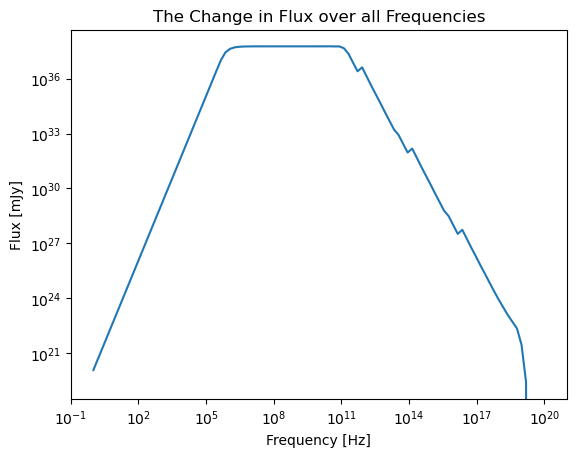

In [41]:
#Now we get our Graph of Flux vs Frequency
plt.figure() #Creating the figure

#We plot the Frequency with Flux.
#(1 Jy = 1e-23 erg/cm^2)
plt.plot(frequency, total_flux*1e-23)

#We also add Labels and Title.
plt.title("The Change in Flux over all Frequencies")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Flux [mJy]")
plt.xscale("log")
plt.yscale("log")

plt.show()

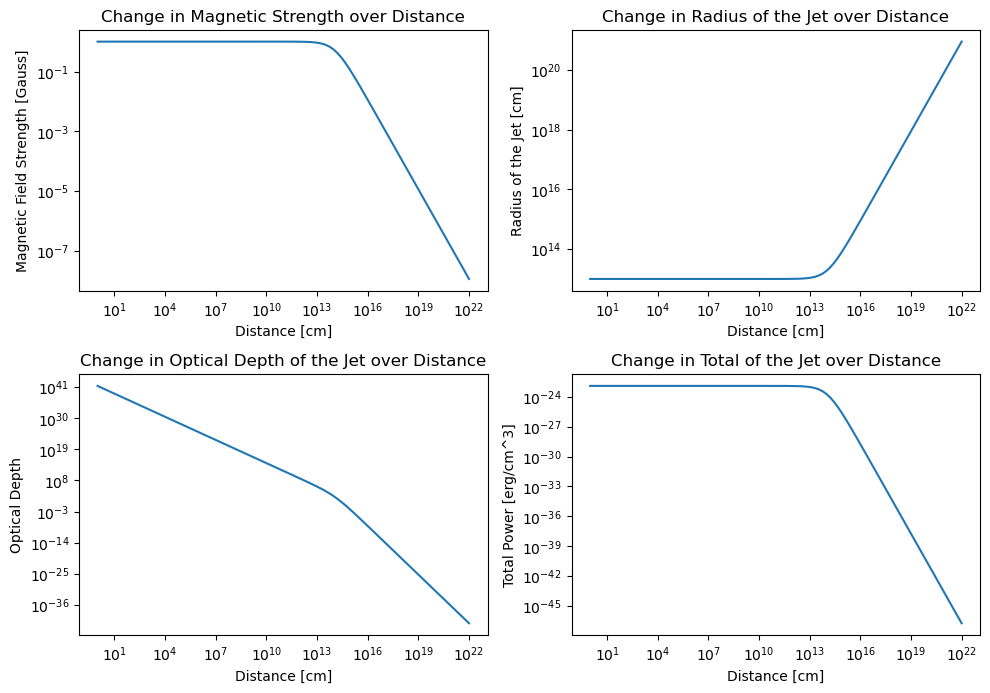

In [38]:
#We now plot other additional plots to make sure it makes sense.
figure = plt.figure(figsize=(10.0, 10.0))

#Setting up plot locations
axes_1 = figure.add_subplot(3, 2, 1)
axes_2 = figure.add_subplot(3, 2, 2)
axes_3 = figure.add_subplot(3, 2, 3)
axes_4 = figure.add_subplot(3, 2, 4)

#Change in Magnetic Strength over Distance
axes_1.plot(distance, Magnetic_Field(distance))
axes_1.set_title("Change in Magnetic Strength over Distance")
axes_1.set_xlabel("Distance [cm]")
axes_1.set_ylabel("Magnetic Field Strength [Gauss]")
axes_1.set_xscale("log")
axes_1.set_yscale("log")

#Change in Radius over Distance
axes_2.plot(distance, Radius(distance))
axes_2.set_title("Change in Radius of the Jet over Distance")
axes_2.set_xlabel("Distance [cm]")
axes_2.set_ylabel("Radius of the Jet [cm]")
axes_2.set_xscale("log")
axes_2.set_yscale("log")

#Change in Optical Depth over Distance
axes_3.plot(distance, Optical_Depth(distance, frequency))
axes_3.set_title("Change in Optical Depth of the Jet over Distance")
axes_3.set_xlabel("Distance [cm]")
axes_3.set_ylabel("Optical Depth")
axes_3.set_xscale("log")
axes_3.set_yscale("log")

#Change in Total Power over Distance
axes_4.plot(distance, Total_Power(distance, frequency))
axes_4.set_title("Change in Total of the Jet over Distance")
axes_4.set_xlabel("Distance [cm]")
axes_4.set_ylabel("Total Power [erg/cm^3]")
axes_4.set_xscale("log")
axes_4.set_yscale("log")

#To tightly & evenly place the figures, sometimes they overlap eachother.
figure.tight_layout()

plt.show()